# Classification Search CV

## Overview

Returns summary for some classification algorithms (see Table below) for [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV) and [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=search#sklearn.model_selection.RandomizedSearchCV).
After fitting, the **descibe** method returns a summary of the cross validation search and a summary of the best model selected.


### Arguments

Arguments |  |
-------|-----
obj | Object to summarize
X | Data. Default: *None*
X_train | Train data
y_pred | Labels predicted for **X**
y_true| Labels true for **X**
y_train | Labels predicted for **X_train**
y_true_train | Labels true for **X_train**
store_X | If X is stored as attribute. Default: *None*
prob_return | If predicted probabilities are stored as attribute. Default: *False*
digits | Number of decimals to round

### Functions

Algorithm | Function | Summary |
-----|------|-------
Linear discriminant Analysis | [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html?highlight=linear%20discriminant#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)| ldaSummaryCV
Quadratic discriminannt analysis | [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis) | qdaSummaryCV
Guassian naive bayes |[GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian%20naive%20bayes#sklearn.naive_bayes.GaussianNB)| gnbSummaryCV
k-nearest neighbors | [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) | knnSummaryCV
Nearest centroid | [NearestCentroid](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html?highlight=nearest%20centroid#sklearn.neighbors.NearestCentroid) | NearestCentroidClassSummaryCV
Radius neighbors | [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html?highlight=radius%20neighbors#sklearn.neighbors.RadiusNeighborsClassifier)| RadiusNeighborsClassSummaryCV
SoftMax regression | [SoftmaxRegression](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.classifier/#softmaxregression) | SoftmaxRegressionSummaryCV
Decision tree classifier | [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) | TreeClassSummaryCV
Bagging classifier | [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) | baggingClassSummaryCV
Random forest classifier | [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) | RandomForestClassSummaryCV
AdaBoost | [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) | AdaBoostClassSummaryCV
Gradient Boosting | [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) | GradientBoostingClassSummaryCV
XGBoost classifier | [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html) |xgboostClassSummaryCV
LightGBM | [LGBMClassifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) | lgbmClassSummaryCV
Support vector machine classifier | [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) | svcSummary


## Classification Trees


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from mlsummary.classification import TreeClassSummaryCV


iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

parameters = {'max_depth': range(3,20)}
tree_cv = GridSearchCV(DecisionTreeClassifier(), parameters).fit(X_train,y_train)


In [10]:
tree_summary = TreeClassSummaryCV(tree_cv, X = X_test, y_true=y_test)
tree_summary.describe()

Cross validation decision tree classifier
------------------
Estimator: DecisionTreeClassifier()
Best estimator: DecisionTreeClassifier(max_depth=15)
Cross validation: 5
Parameters: {'max_depth': range(3, 20)}
Best parameters: {'max_depth': 15}
Best score: 0.962
Results: 
                    mean_test_score  std_test_score  rank_test_score
{'max_depth': 3}             0.933           0.065                8
{'max_depth': 4}             0.933           0.065                8
{'max_depth': 5}             0.933           0.065                8
{'max_depth': 6}             0.924           0.057               14
{'max_depth': 7}             0.933           0.065                8
{'max_depth': 8}             0.952           0.030                2
{'max_depth': 9}             0.943           0.019                4
{'max_depth': 10}            0.924           0.057               14
{'max_depth': 11}            0.943           0.019                4
{'max_depth': 12}            0.933           0

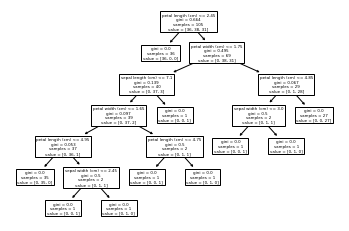

In [11]:
tree_summary.plot_tree(feature_names = X_train.columns)

## Random forest classifier

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from mlsummary.classification import RandomForestClassSummaryCV


iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

n_estimators = [10,20,50]
max_depth = [5,10,20,30]
max_leaf_nodes = [5,10,20,30]

parameters = {'max_depth':max_depth, 'n_estimators' : n_estimators, 'max_leaf_nodes' : max_leaf_nodes}

forest_cv = GridSearchCV(RandomForestClassifier(), parameters).fit(X_train,y_train)

In [13]:
forest_summary = RandomForestClassSummaryCV(forest_cv, X = X_test, y_true=y_test, X_train=X_train, y_true_train = y_train)
forest_summary.describe(cv_result_describe = False)

Cross validation random forest classifier
------------------
Estimator: RandomForestClassifier()
Best estimator: RandomForestClassifier(max_depth=10, max_leaf_nodes=30, n_estimators=10)
Cross validation: 5
Parameters: {'max_depth': [5, 10, 20, 30], 'n_estimators': [10, 20, 50], 'max_leaf_nodes': [5, 10, 20, 30]}
Best parameters: {'max_depth': 10, 'max_leaf_nodes': 30, 'n_estimators': 10}
Best score: 0.962
------------------
Random forest classifier algorithm
------------------
Number of class: 3
Number of trees: 10
Criterion: gini
Maximum features: auto
Maximum depth: 10
Maximum leaf node: 30
Minimum number of samples leaf node: 1
Minimum number of samples: 2
Minimal Cost-Complexity Pruning: 0.0
Priors weight: 
    2.0    0.0    1.0
 0.422  0.311  0.267
Priors size: 
 2.0 0.0 1.0
 19  14  12
------
Train
------
Class weights: 
    1.0    0.0    2.0
 0.352  0.343  0.305
Class size: 
 1.0 0.0 2.0
 37  36  32
Accuracy: 0.99
Class Error: 0.01
Precision Error: 0.99
Recall: 0.99
F1: 0.99
Con

In [14]:
forest_summary.cv_results

,param_max_depth,param_max_leaf_nodes,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 10}",5,5,10,"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estim...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 20}",5,5,20,"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estim...",0.952,0.810,1.0,0.952,1.000,0.943,0.070,8
"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 50}",5,5,50,"{'max_depth': 5, 'max_leaf_nodes': 5, 'n_estim...",0.952,0.810,1.0,1.000,0.952,0.943,0.070,8
"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 10}",5,10,10,"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 20}",5,10,20,"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_estimators': 50}",5,10,50,"{'max_depth': 5, 'max_leaf_nodes': 10, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 10}",5,20,10,"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 20}",5,20,20,"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_estimators': 50}",5,20,50,"{'max_depth': 5, 'max_leaf_nodes': 20, 'n_esti...",0.952,0.857,1.0,0.952,0.952,0.943,0.047,8
"{'max_depth': 5, 'max_leaf_nodes': 30, 'n_estimators': 10}",5,30,10,"{'max_depth': 5, 'max_leaf_nodes': 30, 'n_esti...",0.952,0.810,1.0,0.952,0.952,0.933,0.065,32


In [15]:
forest_summary.feature_importances

petal width (cm)     0.526433
petal length (cm)    0.293919
sepal length (cm)    0.143740
sepal width (cm)     0.035909
dtype: float64

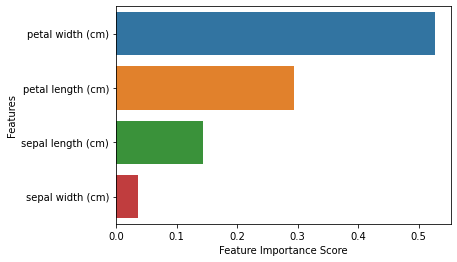

In [16]:
forest_summary.plot_important()

## XGBoost

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from mlsummary.classification import xgboostClassSummaryCV


iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = iris.drop(columns=['target'])
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

n_estimators = [50, 100]
max_depth = [10,20]

parameters = {'max_depth':max_depth, 'n_estimators' : n_estimators}
xgboost_cv = GridSearchCV(xgb.XGBClassifier(), parameters).fit(X_train,y_train)

In [18]:
xgboost_summary = xgboostClassSummaryCV(xgboost_cv, X=X_test, y_true = y_test, X_train = X_train, y_true_train = y_train)
xgboost_summary.describe(best_model_describe = False)

Cross validation XGBoost classifier
------------------
Estimator: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
    

In [19]:
xgboost_summary.conf_train

,0,1,2
0,36,0,0
1,0,38,0
2,0,0,31


In [20]:
xgboost_summary.conf

,0,1,2
0,14,0,0
1,0,12,0
2,0,3,16


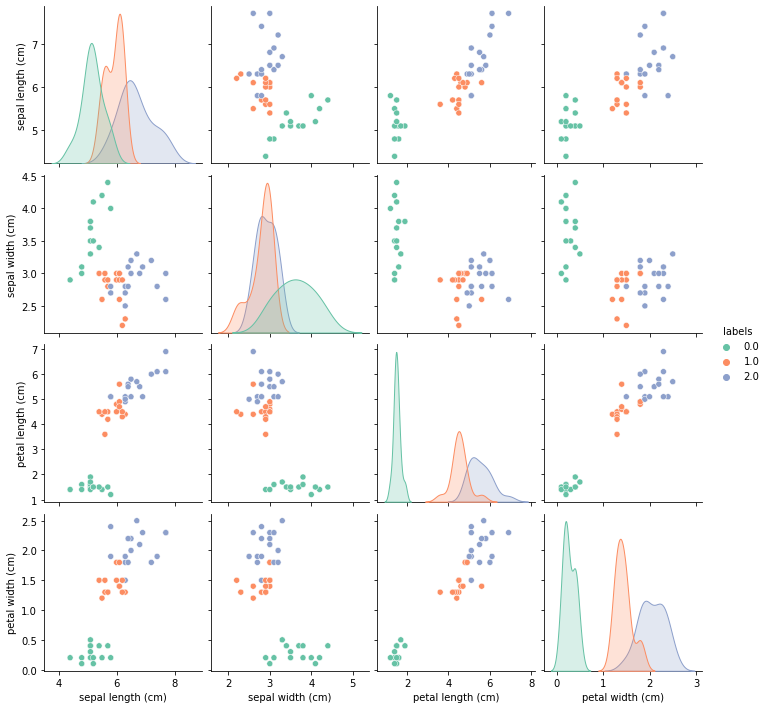

In [21]:
xgboost_summary.plot(X_test,xgboost_summary.labels_pred)
